In [15]:
import math
import statistics
from glob import glob
from os.path import join
from os.path import basename

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from utility.utility import *
from utility.models_wo_relu import DISENTANGLE_MODEL as DISENTANGLE_MODEL2


In [16]:
BASE_DIR = '../font2img'
FONT_IMAGE_DIR = 'image'
FONT_CSV = 'google_font_category_v4.csv'

font_df = pd.read_csv(join(BASE_DIR, FONT_CSV))
print(font_df)

      Unnamed: 0                  font     category  \
0              0       ubuntucondensed   SANS_SERIF   
1              1                ubuntu   SANS_SERIF   
2              2            ubuntumono    MONOSPACE   
3              3            robotomono    MONOSPACE   
4              4           craftygirls  HANDWRITING   
...          ...                   ...          ...   
1386        1386    imfelldoublepicasc        SERIF   
1387        1387             quicksand   SANS_SERIF   
1388        1388    librebarcode39text      DISPLAY   
1389        1389    notosansoldpersian   SANS_SERIF   
1390        1390  notosansoldhungarian   SANS_SERIF   

                                                subsets  isin_latin data_type  
0     ['menu', 'cyrillic', 'cyrillic-ext', 'greek', ...        True     valid  
1     ['cyrillic', 'cyrillic-ext', 'greek', 'greek-e...        True     valid  
2     ['menu', 'cyrillic', 'cyrillic-ext', 'greek', ...        True     valid  
3     ['cyrillic', 

In [17]:
font_df[font_df['font'] == 'hermeneusone']

,Unnamed: 0,font,category,subsets,isin_latin,data_type
1288,1288,hermeneusone,SANS_SERIF,"['menu', 'latin', 'latin-ext']",True,train


In [18]:
OUTPUT_FILE = 'char_class.csv'

font_dir_path = [p for p in  glob(join(BASE_DIR, FONT_IMAGE_DIR, '*'))]

regular_path_dic = {'SERIF': [], 'SANS_SERIF': []}
for p in font_dir_path:
    p_base = basename(p)
    fontname = p_base.split('-')[0].split('[')[0].lower()
    subset = p_base.split('-')[-1].lower()
    if subset != 'regular': continue
    line = font_df[font_df['font'] == fontname]
    if not line.empty:
        data_type = line['data_type'].item()
        category = line['category'].item()
        if data_type == 'train' and (category == 'SERIF' or category == 'SANS_SERIF'):
            regular_path_dic[category].append(p)
        
print(len(regular_path_dic['SERIF']), len(regular_path_dic['SANS_SERIF']))

bold_path_dic = {'SERIF': [], 'SANS_SERIF': []}
for p in font_dir_path:
    p_base = basename(p)
    fontname = p_base.split('-')[0].split('[')[0].lower()
    subset = p_base.split('-')[-1].lower()
    if subset != 'bold': continue
    line = font_df[font_df['font'] == fontname]
    if not line.empty:
        data_type = line['data_type'].item()
        category = line['category'].item()
        if data_type == 'train' and (category == 'SERIF' or category == 'SANS_SERIF'):
            bold_path_dic[category].append(p)
        
print(len(bold_path_dic['SERIF']), len(bold_path_dic['SANS_SERIF']))

thin_path_dic = {'SERIF': [], 'SANS_SERIF': []}
for p in font_dir_path:
    p_base = basename(p)
    fontname = p_base.split('-')[0].split('[')[0].lower()
    subset = p_base.split('-')[-1].lower()
    if subset != 'thin': continue
    line = font_df[font_df['font'] == fontname]
    if not line.empty:
        data_type = line['data_type'].item()
        category = line['category'].item()
        if (category == 'SERIF' or category == 'SANS_SERIF'):
            thin_path_dic[category].append(p)
        
print(len(thin_path_dic['SERIF']), len(thin_path_dic['SANS_SERIF']))




101 159
42 81
7 44


In [19]:
print(regular_path_dic['SERIF'][:3], regular_path_dic['SANS_SERIF'][:3])
print(bold_path_dic['SERIF'][:3], bold_path_dic['SANS_SERIF'][:3])
print(thin_path_dic['SERIF'][:3], thin_path_dic['SANS_SERIF'][:3])


['../font2img/image/Arvo-Regular', '../font2img/image/CormorantUnicase-Regular', '../font2img/image/Poly-Regular'] ['../font2img/image/Abel-Regular', '../font2img/image/Convergence-Regular', '../font2img/image/Mukta-Regular']
['../font2img/image/ArefRuqaa-Bold', '../font2img/image/Judson-Bold', '../font2img/image/Lusitana-Bold'] ['../font2img/image/Amiko-Bold', '../font2img/image/EncodeSansCondensed-Bold', '../font2img/image/Lekton-Bold']
['../font2img/image/Nokora-Thin', '../font2img/image/Taviraj-Thin', '../font2img/image/Grenze-Thin'] ['../font2img/image/IBMPlexSans-Thin', '../font2img/image/GothicA1-Thin', '../font2img/image/EncodeSansCondensed-Thin']


In [20]:
device = 'cuda:0'

model = DISENTANGLE_MODEL2(zdim=256, ch_num=26)
model.load_state_dict(torch.load('./best_model_without_relu.pth', map_location=device))

for param in model.parameters():
    param.requires_grad = False
model.to(device)
model.eval()


DISENTANGLE_MODEL(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
  )
  (fc_c): Sequential(
    (0): Linear(in_features=12544, out_features=512, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): Linear(in_features=512, out_features=128, bias=True)
  )
  (fc_f): Sequential(
    (0)

In [21]:

regular_posi_result = {'style1': [], 'style2': [], 'diff': []}
regular_nega_result = {'style1': [], 'style2': [], 'diff': []}
bold_posi_result = {'style1': [], 'style2': [], 'diff': []}
bold_nega_result = {'style1': [], 'style2': [], 'diff': []}
thin_posi_result = {'style1': [], 'style2': [], 'diff': []}
thin_nega_result = {'style1': [], 'style2': [], 'diff': []}

for serif_path in regular_path_dic['SERIF']:
    serif_img = load_images(serif_path + '/A.png', device)
    for sanserif_path in regular_path_dic['SANS_SERIF']:
        sanserif_img = load_images(sanserif_path + '/A.png', device)
        
        z_f_serif = model(serif_img, [])[2][0]
        z_f_sanserif = model(sanserif_img, [])[2][0]
        diff1 = z_f_serif - z_f_sanserif
        diff2 = z_f_sanserif - z_f_serif
        
        regular_posi_result['style1'].append(serif_path)
        regular_posi_result['style2'].append(sanserif_path)
        regular_posi_result['diff'].append(diff1.cpu().detach().numpy())
        
        regular_nega_result['style1'].append(sanserif_path)
        regular_nega_result['style2'].append(serif_path)
        regular_nega_result['diff'].append(diff2.cpu().detach().numpy())

for serif_path in bold_path_dic['SERIF']:
    serif_img = load_images(serif_path + '/A.png', device)
    for sanserif_path in bold_path_dic['SANS_SERIF']:
        sanserif_img = load_images(sanserif_path + '/A.png', device)
        
        z_f_serif = model(serif_img, [])[2][0]
        z_f_sanserif = model(sanserif_img, [])[2][0]
        diff1 = z_f_serif - z_f_sanserif
        diff2 = z_f_sanserif - z_f_serif
        
        bold_posi_result['style1'].append(serif_path)
        bold_posi_result['style2'].append(sanserif_path)
        bold_posi_result['diff'].append(diff1.cpu().detach().numpy())
        
        bold_nega_result['style1'].append(sanserif_path)
        bold_nega_result['style2'].append(serif_path)
        bold_nega_result['diff'].append(diff2.cpu().detach().numpy())


for serif_path in thin_path_dic['SERIF']:
    serif_img = load_images(serif_path + '/A.png', device)
    for sanserif_path in thin_path_dic['SANS_SERIF']:
        sanserif_img = load_images(sanserif_path + '/A.png', device)
        
        z_f_serif = model(serif_img, [])[2][0]
        z_f_sanserif = model(sanserif_img, [])[2][0]
        diff1 = z_f_serif - z_f_sanserif
        diff2 = z_f_sanserif - z_f_serif
        
        thin_posi_result['style1'].append(serif_path)
        thin_posi_result['style2'].append(sanserif_path)
        thin_posi_result['diff'].append(diff1.cpu().detach().numpy())
        
        thin_nega_result['style1'].append(sanserif_path)
        thin_nega_result['style2'].append(serif_path)
        thin_nega_result['diff'].append(diff2.cpu().detach().numpy())

        
# serif_sanserif_df = pd.DataFrame(serif_sanserif_result)
# serif_sanserif_df.to_csv('serif_sanserif.csv', index=False)

# sanserif_serif_df = pd.DataFrame(sanserif_serif_result)
# sanserif_serif_df.to_csv('sanserif_serif.csv', index=False)

# positive

**regular** mean: 1094.2287541003182, median: 775.3644714355469
**bold** mean: 1153.7178689675216, median: 953.7614135742188
**thin** mean: 644.2431359724565, median: 548.4974365234375


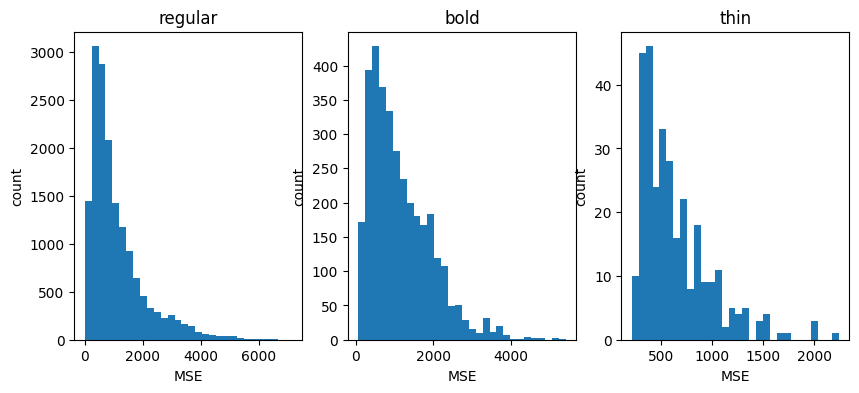

In [22]:
# POSI
bins = 30
REF_INDEX = 150
ref = regular_posi_result['diff'][REF_INDEX]


fig, axes = plt.subplots(1, 3, figsize=(10, 4))

regular_diff_posi = []
for i, di in enumerate(regular_posi_result['diff']):
    if i == REF_INDEX: continue
    mse_diff = nn.MSELoss()(torch.tensor(ref), torch.tensor(di)).item()
    regular_diff_posi.append(mse_diff)
    
axes[0].set_xlabel('MSE')
axes[0].set_ylabel('count')

axes[0].set_title('regular')
axes[0].hist(regular_diff_posi, bins=bins)

mean = statistics.mean(regular_diff_posi)
median = statistics.median(regular_diff_posi)

print('**regular** mean: {}, median: {}'.format(mean, median))

bold_diff_posi = []
for di in bold_posi_result['diff']:
    mse_diff = nn.MSELoss()(torch.tensor(ref), torch.tensor(di)).item()
    bold_diff_posi.append(mse_diff)

axes[1].set_xlabel('MSE')
axes[1].set_ylabel('count')

axes[1].set_title('bold')    
axes[1].hist(bold_diff_posi, bins=bins)

mean = statistics.mean(bold_diff_posi)
median = statistics.median(bold_diff_posi)

print('**bold** mean: {}, median: {}'.format(mean, median))

thin_diff_posi = []
for di in thin_posi_result['diff']:
    mse_diff = nn.MSELoss()(torch.tensor(ref), torch.tensor(di)).item()
    thin_diff_posi.append(mse_diff)

axes[2].set_xlabel('MSE')
axes[2].set_ylabel('count')

axes[2].set_title('thin')
axes[2].hist(thin_diff_posi, bins=bins)

mean = statistics.mean(thin_diff_posi)
median = statistics.median(thin_diff_posi)

print('**thin** mean: {}, median: {}'.format(mean, median))

## ちいさいやつ

refrence
../font2img/image/Arvo-Regular ../font2img/image/AlegreyaSans-Regular


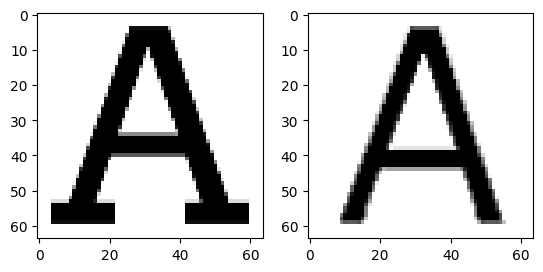

In [23]:
print('refrence')

print(regular_posi_result['style1'][REF_INDEX], regular_posi_result['style2'][REF_INDEX])


ref_s1_img = load_images(regular_posi_result['style1'][REF_INDEX] + '/A.png', 'cpu')[0][0]
ref_s2_img = load_images(regular_posi_result['style2'][REF_INDEX] + '/A.png', 'cpu')[0][0]


fig, axes = plt.subplots(1, 2)
axes[0].imshow(ref_s1_img, cmap='gray')
axes[1].imshow(ref_s2_img, cmap='gray')


### regular

11  diff: 27.054201126098633 ../font2img/image/Arvo-Regular ../font2img/image/HindKochi-Regular
12  diff: 27.054201126098633 ../font2img/image/Arvo-Regular ../font2img/image/HindKochi-Regular
13  diff: 27.19122886657715 ../font2img/image/Arvo-Regular ../font2img/image/HindColombo-Regular
14  diff: 27.292198181152344 ../font2img/image/Arvo-Regular ../font2img/image/Harmattan-Regular
15  diff: 27.444869995117188 ../font2img/image/Arvo-Regular ../font2img/image/EncodeSansSemiCondensed-Regular
16  diff: 27.684492111206055 ../font2img/image/Pridi-Regular ../font2img/image/Mina-Regular


/tmp/ipykernel_798808/2481778586.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


17  diff: 27.684492111206055 ../font2img/image/Pridi-Regular ../font2img/image/Mina-Regular
18  diff: 27.684492111206055 ../font2img/image/Pridi-Regular ../font2img/image/Mina-Regular
19  diff: 27.684492111206055 ../font2img/image/Pridi-Regular ../font2img/image/Mina-Regular
20  diff: 27.76136589050293 ../font2img/image/Arvo-Regular ../font2img/image/Palanquin-Regular


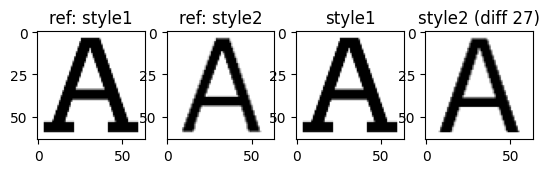

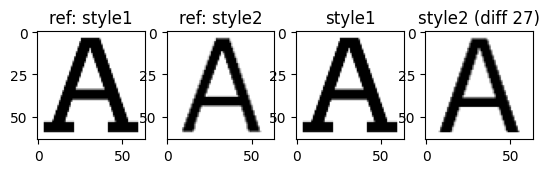

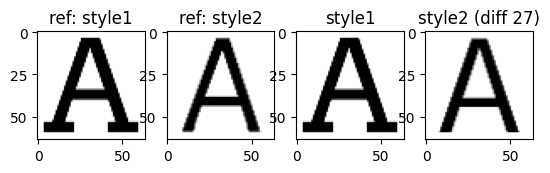

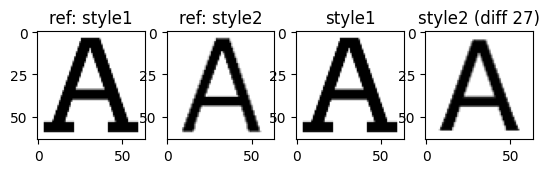

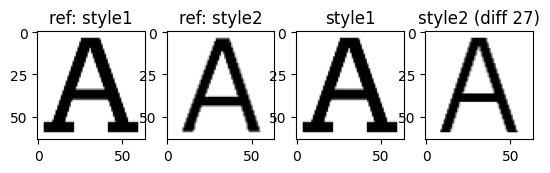

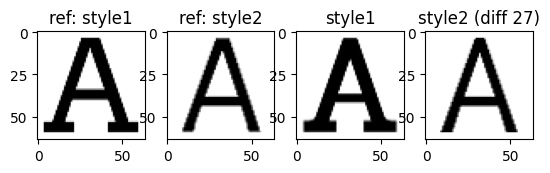

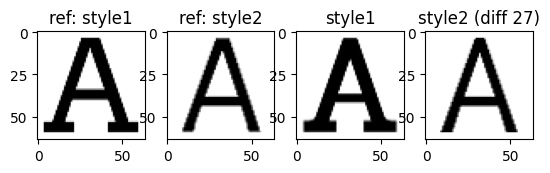

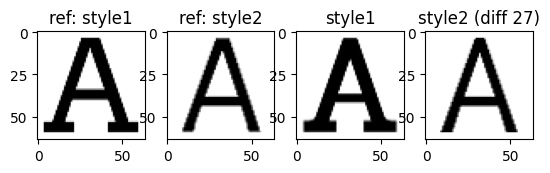

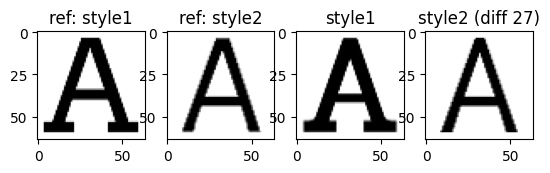

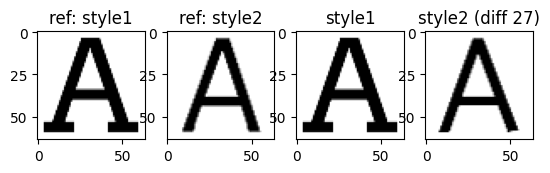

In [25]:
N = 10
sorted_regular_diff_posi = sorted(regular_diff_posi)

for i in range(10):
    nmin_v = sorted_regular_diff_posi[N+i]
    nmin_i = regular_diff_posi.index(nmin_v)
    print(N+i+1, ' diff:', nmin_v, regular_posi_result['style1'][nmin_i], regular_posi_result['style2'][nmin_i])

    s1_img = load_images(regular_posi_result['style1'][nmin_i] + '/A.png', 'cpu')[0][0]
    s2_img = load_images(regular_posi_result['style2'][nmin_i] + '/A.png', 'cpu')[0][0]

    fig, axes = plt.subplots(1, 4)
    axes[0].set_title('ref: style1')
    axes[0].imshow(ref_s1_img, cmap='gray')
    axes[1].set_title('ref: style2')
    axes[1].imshow(ref_s2_img, cmap='gray')
    axes[2].set_title('style1')
    axes[2].imshow(s1_img, cmap='gray')
    axes[3].set_title('style2 (diff {})'.format(int(nmin_v)))
    axes[3].imshow(s2_img, cmap='gray')
    fig.show()


### bold

1  diff: 63.94003677368164 ../font2img/image/NoticiaText-Bold ../font2img/image/Arya-Bold
2  diff: 64.5718765258789 ../font2img/image/IBMPlexSerif-Bold ../font2img/image/Arya-Bold
3  diff: 72.63375854492188 ../font2img/image/Kadwa-Bold ../font2img/image/Harmattan-Bold
4  diff: 79.78120422363281 ../font2img/image/Kadwa-Bold ../font2img/image/AlegreyaSansSC-Bold
5  diff: 83.15160369873047 ../font2img/image/Kadwa-Bold ../font2img/image/AlegreyaSans-Bold
6  diff: 89.0452651977539 ../font2img/image/Enriqueta-Bold ../font2img/image/Andika-Bold
7  diff: 89.5716552734375 ../font2img/image/Enriqueta-Bold ../font2img/image/PragatiNarrow-Bold
8  diff: 91.53385162353516 ../font2img/image/Enriqueta-Bold ../font2img/image/GothicA1-Bold
9  diff: 95.07685089111328 ../font2img/image/Halant-Bold ../font2img/image/Arya-Bold
10  diff: 97.93428802490234 ../font2img/image/Enriqueta-Bold ../font2img/image/AlegreyaSans-Bold


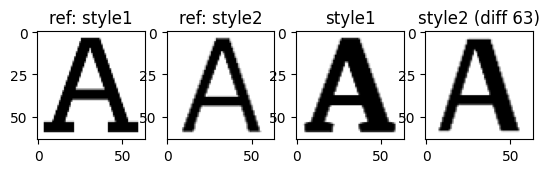

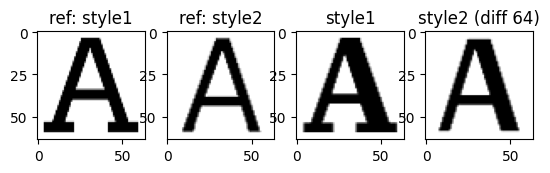

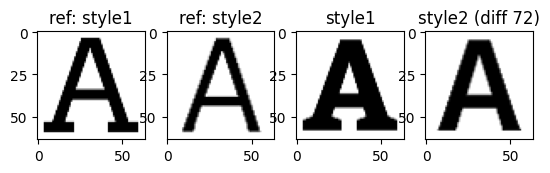

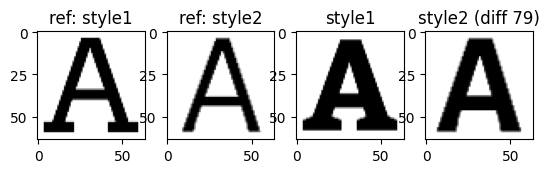

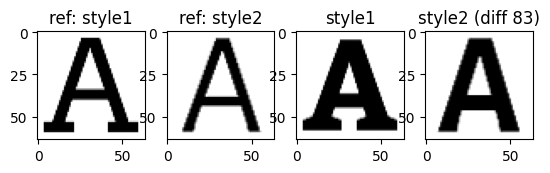

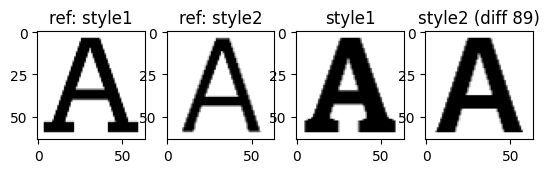

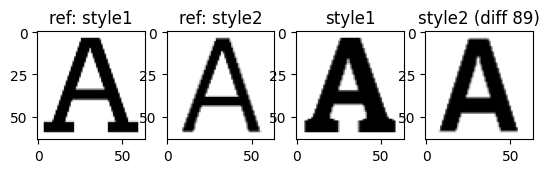

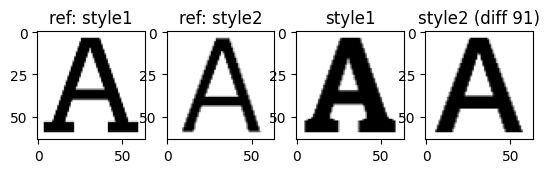

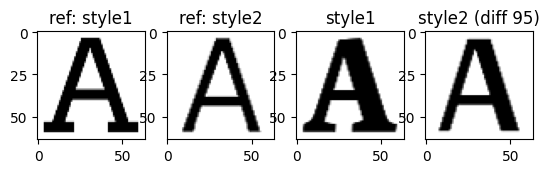

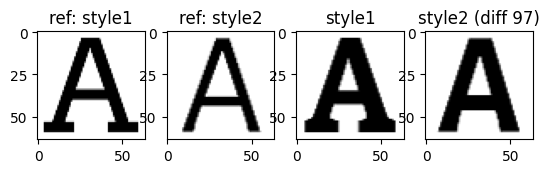

In [97]:
N = 0
sorted_bold_diff_posi = sorted(bold_diff_posi)

for i in range(10):
    nmin_v = sorted_bold_diff_posi[N+i]
    nmin_i = bold_diff_posi.index(nmin_v)
    print(N+i+1, ' diff:', nmin_v, bold_posi_result['style1'][nmin_i], bold_posi_result['style2'][nmin_i])

    s1_img = load_images(bold_posi_result['style1'][nmin_i] + '/A.png', 'cpu')[0][0]
    s2_img = load_images(bold_posi_result['style2'][nmin_i] + '/A.png', 'cpu')[0][0]

    fig, axes = plt.subplots(1, 4)
    axes[0].set_title('ref: style1')
    axes[0].imshow(ref_s1_img, cmap='gray')
    axes[1].set_title('ref: style2')
    axes[1].imshow(ref_s2_img, cmap='gray')
    axes[2].set_title('style1')
    axes[2].imshow(s1_img, cmap='gray')
    axes[3].set_title('style2 (diff {})'.format(int(nmin_v)))
    axes[3].imshow(s2_img, cmap='gray')
    fig.show()


### thin

1  diff: 217.01394653320312 ../font2img/image/Taviraj-Thin ../font2img/image/FiraSans-Thin
2  diff: 228.65504455566406 ../font2img/image/Taviraj-Thin ../font2img/image/AdventPro-Thin
3  diff: 246.69522094726562 ../font2img/image/Taviraj-Thin ../font2img/image/IBMPlexSansKR-Thin
4  diff: 253.859130859375 ../font2img/image/Taviraj-Thin ../font2img/image/Yantramanav-Thin
5  diff: 257.6515197753906 ../font2img/image/Trirong-Thin ../font2img/image/FiraSans-Thin
6  diff: 269.0791015625 ../font2img/image/Grenze-Thin ../font2img/image/IBMPlexSansCondensed-Thin
7  diff: 270.8782043457031 ../font2img/image/Grenze-Thin ../font2img/image/FiraSansCondensed-Thin
8  diff: 274.649169921875 ../font2img/image/Trirong-Thin ../font2img/image/FiraSansCondensed-Thin
9  diff: 274.796142578125 ../font2img/image/Grenze-Thin ../font2img/image/FiraSans-Thin
10  diff: 278.8360595703125 ../font2img/image/Grenze-Thin ../font2img/image/AdventPro-Thin


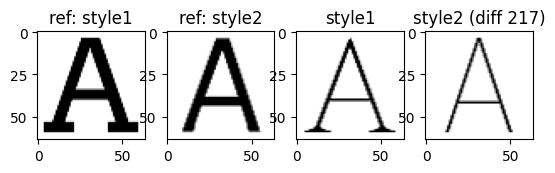

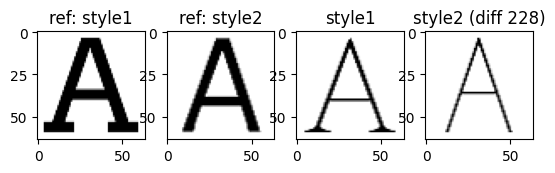

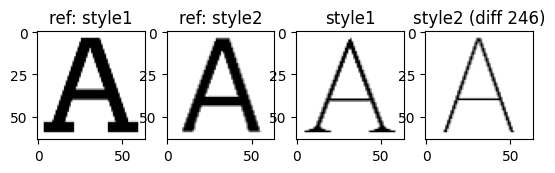

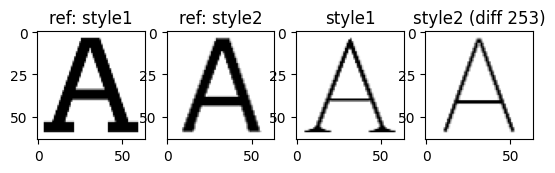

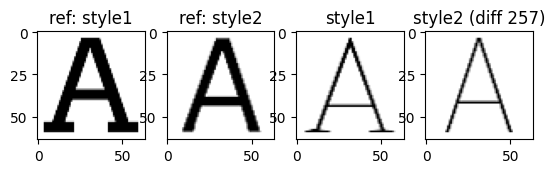

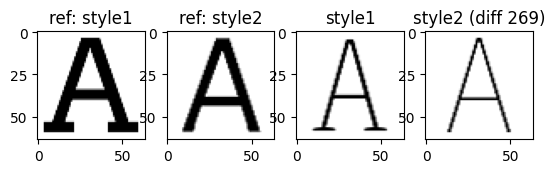

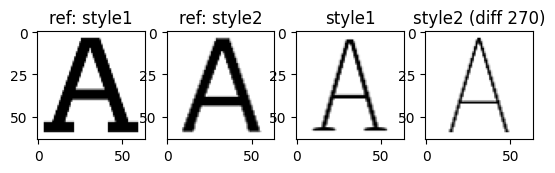

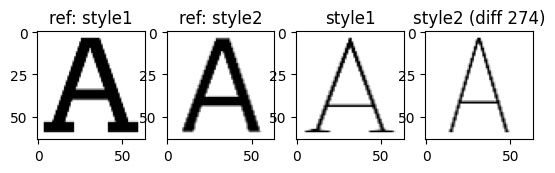

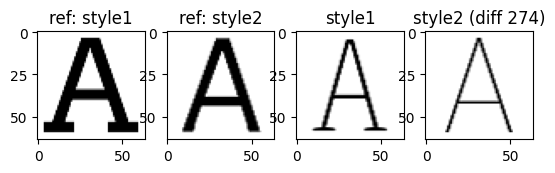

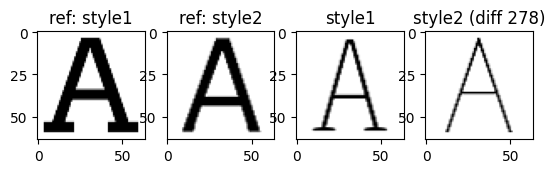

In [98]:
N = 0
sorted_thin_diff_posi = sorted(thin_diff_posi)

for i in range(10):
    nmin_v = sorted_thin_diff_posi[N+i]
    nmin_i = thin_diff_posi.index(nmin_v)
    print(N+i+1, ' diff:', nmin_v, thin_posi_result['style1'][nmin_i], thin_posi_result['style2'][nmin_i])

    s1_img = load_images(thin_posi_result['style1'][nmin_i] + '/A.png', 'cpu')[0][0]
    s2_img = load_images(thin_posi_result['style2'][nmin_i] + '/A.png', 'cpu')[0][0]

    fig, axes = plt.subplots(1, 4)
    axes[0].set_title('ref: style1')
    axes[0].imshow(ref_s1_img, cmap='gray')
    axes[1].set_title('ref: style2')
    axes[1].imshow(ref_s2_img, cmap='gray')
    axes[2].set_title('style1')
    axes[2].imshow(s1_img, cmap='gray')
    axes[3].set_title('style2 (diff {})'.format(int(nmin_v)))
    axes[3].imshow(s2_img, cmap='gray')
    fig.show()


### おおきいやつ

In [102]:
def nmax_show(result_dic, diff_list):
    N = 0
    sorted_diff_list = sorted(diff_list)

    for i in range(10):
        nmax_v = sorted_diff_list[-(N+i+1)]
        nmax_i = diff_list.index(nmax_v)
        print(N+i+1, ' diff:', nmax_v, result_dic['style1'][nmax_i], result_dic['style2'][nmax_i])

        s1_img = load_images(result_dic['style1'][nmax_i] + '/A.png', 'cpu')[0][0]
        s2_img = load_images(result_dic['style2'][nmax_i] + '/A.png', 'cpu')[0][0]

        fig, axes = plt.subplots(1, 4)
        axes[0].set_title('ref: style1')
        axes[0].imshow(ref_s1_img, cmap='gray')
        axes[1].set_title('ref: style2')
        axes[1].imshow(ref_s2_img, cmap='gray')
        axes[2].set_title('style1')
        axes[2].imshow(s1_img, cmap='gray')
        axes[3].set_title('style2 (diff {})'.format(int(nmax_v)))
        axes[3].imshow(s2_img, cmap='gray')
        fig.show()


1  diff: 2240.703125 ../font2img/image/Nokora-Thin ../font2img/image/SairaExtraCondensed-Thin
2  diff: 2024.635009765625 ../font2img/image/Hanuman-Thin ../font2img/image/SairaExtraCondensed-Thin
3  diff: 2024.635009765625 ../font2img/image/Hanuman-Thin ../font2img/image/SairaExtraCondensed-Thin
4  diff: 2002.0850830078125 ../font2img/image/IBMPlexSerif-Thin ../font2img/image/SairaExtraCondensed-Thin
5  diff: 1732.32470703125 ../font2img/image/Nokora-Thin ../font2img/image/BarlowCondensed-Thin
6  diff: 1688.1646728515625 ../font2img/image/Taviraj-Thin ../font2img/image/SairaExtraCondensed-Thin
7  diff: 1545.67822265625 ../font2img/image/Hanuman-Thin ../font2img/image/BarlowCondensed-Thin
8  diff: 1545.67822265625 ../font2img/image/Hanuman-Thin ../font2img/image/BarlowCondensed-Thin
9  diff: 1501.300537109375 ../font2img/image/IBMPlexSerif-Thin ../font2img/image/BarlowCondensed-Thin
10  diff: 1500.477294921875 ../font2img/image/Nokora-Thin ../font2img/image/Gayathri-Thin


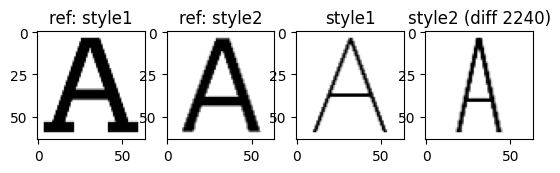

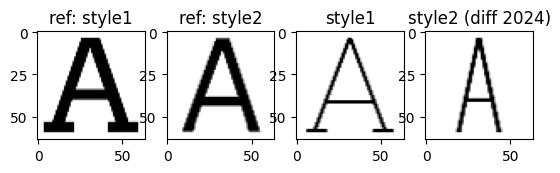

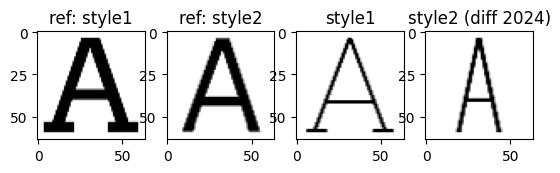

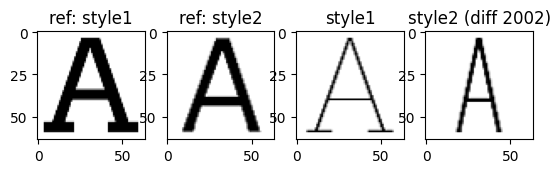

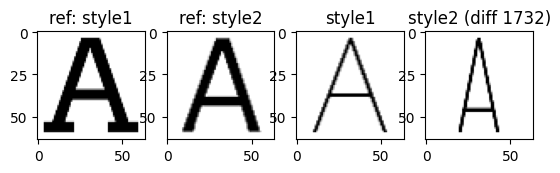

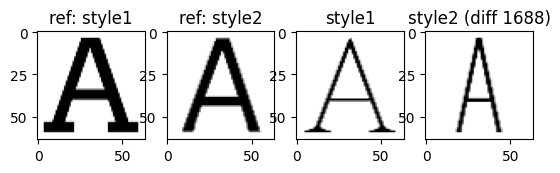

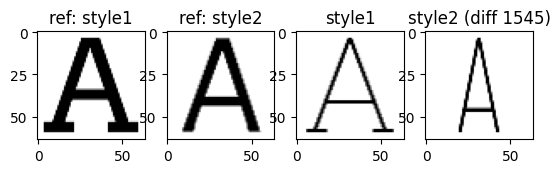

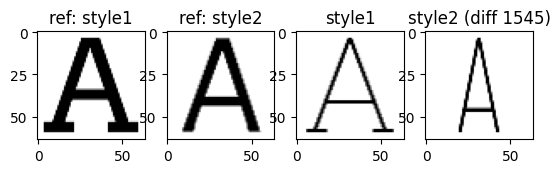

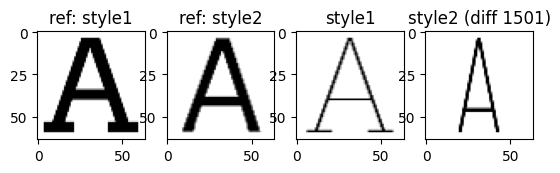

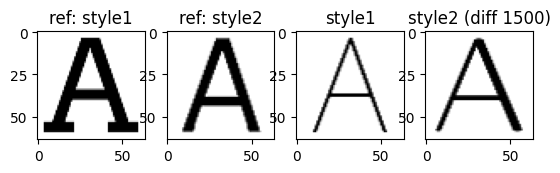

In [103]:
nmax_show(thin_posi_result, thin_diff_posi)

# negative

**regular** mean: 1623.67289967714, median: 1357.7927856445312
**bold** mean: 1638.7490578213556, median: 1481.05078125
**thin** mean: 1503.3374032283175, median: 1409.0283203125


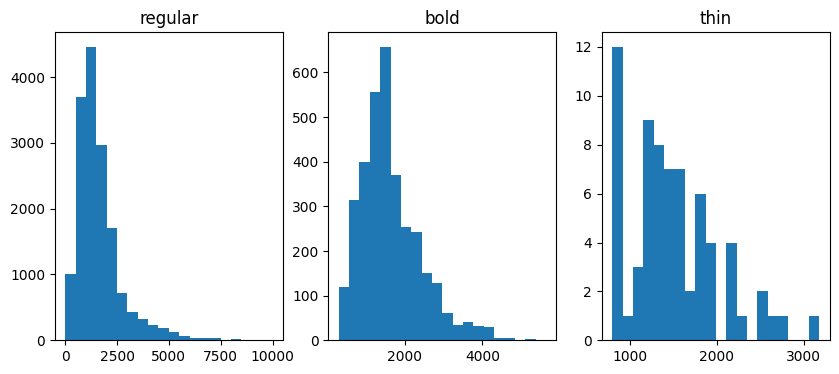

In [58]:
# NEGA
REF_INDEX = 201
ref = regular_nega_result['diff'][REF_INDEX]


fig, axes = plt.subplots(1, 3, figsize=(10, 4))

regular_diff_nega = []
for i, di in enumerate(regular_nega_result['diff']):
    if i == REF_INDEX: continue
    mse_diff = nn.MSELoss()(torch.tensor(ref), torch.tensor(di)).item()
    regular_diff_nega.append(mse_diff)
    
axes[0].set_title('regular')
axes[0].hist(regular_diff_nega, bins=20)

mean = statistics.mean(regular_diff_nega)
median = statistics.median(regular_diff_nega)

print('**regular** mean: {}, median: {}'.format(mean, median))

bold_diff_nega = []
for di in bold_nega_result['diff']:
    mse_diff = nn.MSELoss()(torch.tensor(ref), torch.tensor(di)).item()
    bold_diff_nega.append(mse_diff)

axes[1].set_title('bold')    
axes[1].hist(bold_diff_nega, bins=20)

mean = statistics.mean(bold_diff_nega)
median = statistics.median(bold_diff_nega)

print('**bold** mean: {}, median: {}'.format(mean, median))

thin_diff_nega = []
for di in thin_nega_result['diff']:
    mse_diff = nn.MSELoss()(torch.tensor(ref), torch.tensor(di)).item()
    thin_diff_nega.append(mse_diff)

axes[2].set_title('thin')
axes[2].hist(thin_diff_nega, bins=20)

mean = statistics.mean(thin_diff_nega)
median = statistics.median(thin_diff_nega)

print('**thin** mean: {}, median: {}'.format(mean, median))

## ちいさいやつ

refrence
../font2img/image/Lekton-Regular ../font2img/image/CormorantUnicase-Regular


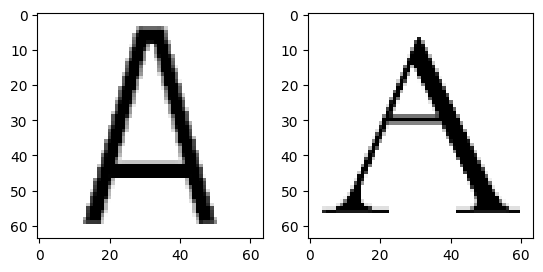

In [59]:
print('refrence')

print(regular_nega_result['style1'][REF_INDEX], regular_nega_result['style2'][REF_INDEX])


ref_s1_img = load_images(regular_nega_result['style1'][REF_INDEX] + '/A.png', 'cpu')[0][0]
ref_s2_img = load_images(regular_nega_result['style2'][REF_INDEX] + '/A.png', 'cpu')[0][0]


fig, axes = plt.subplots(1, 2)
axes[0].imshow(ref_s1_img, cmap='gray')
axes[1].imshow(ref_s2_img, cmap='gray')


### regular

1  diff: 0.00020496119395829737 ../font2img/image/IstokWeb-Regular ../font2img/image/CormorantSC-Regular
2  diff: 0.5981330871582031 ../font2img/image/IstokWeb-Regular ../font2img/image/CormorantInfant-Regular
3  diff: 15.957283973693848 ../font2img/image/IstokWeb-Regular ../font2img/image/CormorantGaramond-Regular
4  diff: 84.49620056152344 ../font2img/image/IstokWeb-Regular ../font2img/image/GildaDisplay-Regular
5  diff: 99.67569732666016 ../font2img/image/IstokWeb-Regular ../font2img/image/CormorantUpright-Regular
6  diff: 109.17780303955078 ../font2img/image/Molengo-Regular ../font2img/image/Montaga-Regular
7  diff: 109.17780303955078 ../font2img/image/Molengo-Regular ../font2img/image/Montaga-Regular
8  diff: 125.83231353759766 ../font2img/image/BubblerOne-Regular ../font2img/image/Montaga-Regular
9  diff: 126.10367584228516 ../font2img/image/Abel-Regular ../font2img/image/CormorantUnicase-Regular
10  diff: 126.24601745605469 ../font2img/image/Belleza-Regular ../font2img/image/Jud

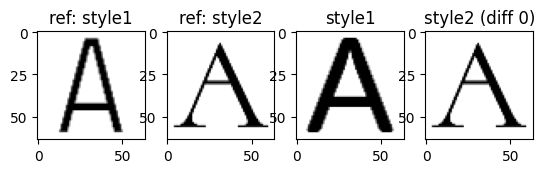

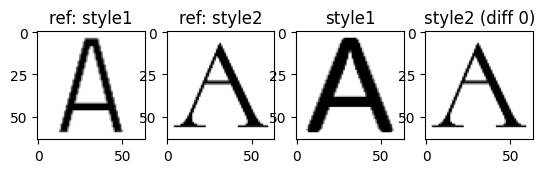

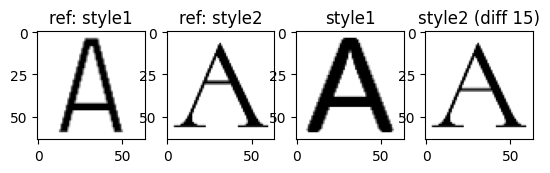

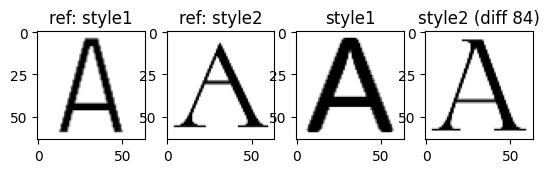

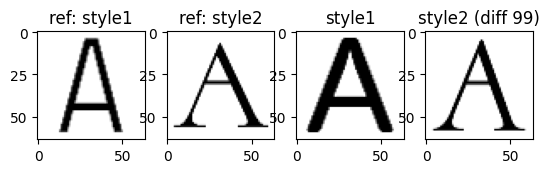

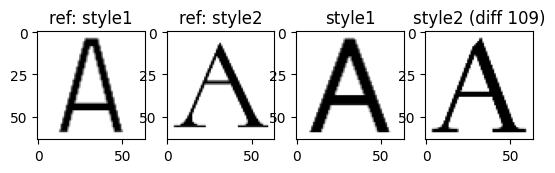

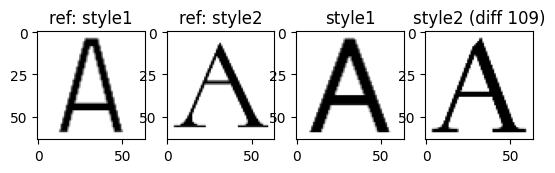

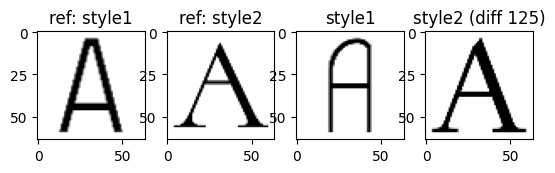

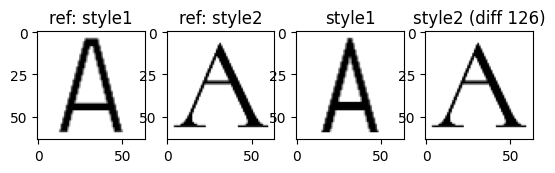

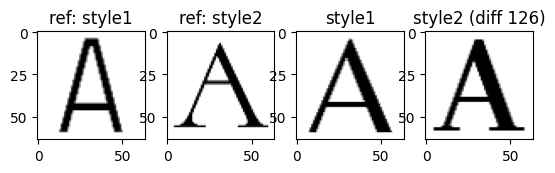

In [60]:
N = 0
sorted_regular_diff_nega = sorted(regular_diff_nega)

for i in range(10):
    nmin_v = sorted_regular_diff_nega[N+i]
    nmin_i = regular_diff_nega.index(nmin_v)
    print(N+i+1, ' diff:', nmin_v, regular_nega_result['style1'][nmin_i], regular_nega_result['style2'][nmin_i])

    s1_img = load_images(regular_nega_result['style1'][nmin_i] + '/A.png', 'cpu')[0][0]
    s2_img = load_images(regular_nega_result['style2'][nmin_i] + '/A.png', 'cpu')[0][0]

    fig, axes = plt.subplots(1, 4)
    axes[0].set_title('ref: style1')
    axes[0].imshow(ref_s1_img, cmap='gray')
    axes[1].set_title('ref: style2')
    axes[1].imshow(ref_s2_img, cmap='gray')
    axes[2].set_title('style1')
    axes[2].imshow(s1_img, cmap='gray')
    axes[3].set_title('style2 (diff {})'.format(int(nmin_v)))
    axes[3].imshow(s2_img, cmap='gray')
    fig.show()


### bold

1  diff: 297.39886474609375 ../font2img/image/Chathura-Bold ../font2img/image/CormorantSC-Bold
2  diff: 297.6264953613281 ../font2img/image/Chathura-Bold ../font2img/image/CormorantUnicase-Bold
3  diff: 298.3992004394531 ../font2img/image/Chathura-Bold ../font2img/image/CormorantInfant-Bold
4  diff: 298.8372802734375 ../font2img/image/Lekton-Bold ../font2img/image/CrimsonText-Bold
5  diff: 305.9808654785156 ../font2img/image/Lekton-Bold ../font2img/image/LibreBaskerville-Bold
6  diff: 311.7642822265625 ../font2img/image/Lekton-Bold ../font2img/image/AbhayaLibre-Bold
7  diff: 313.47845458984375 ../font2img/image/Chathura-Bold ../font2img/image/CormorantGaramond-Bold
8  diff: 320.9721374511719 ../font2img/image/Chathura-Bold ../font2img/image/CormorantUpright-Bold
9  diff: 327.4671936035156 ../font2img/image/Lekton-Bold ../font2img/image/Amiri-Bold
10  diff: 329.8730163574219 ../font2img/image/Lekton-Bold ../font2img/image/Buenard-Bold


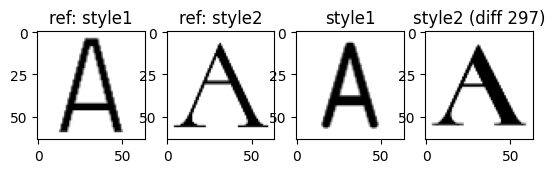

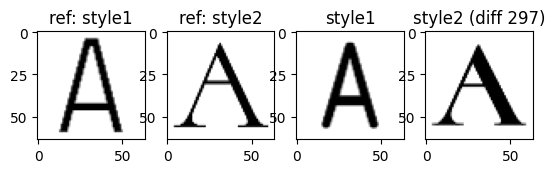

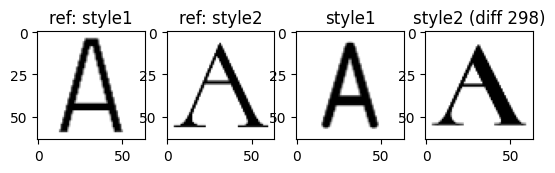

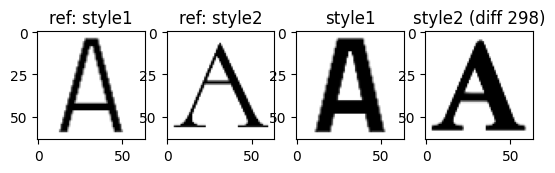

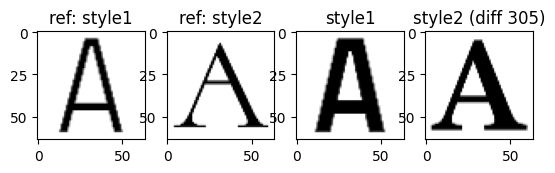

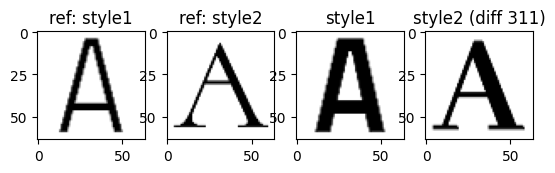

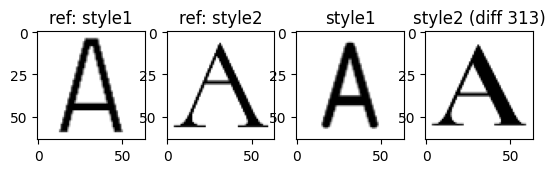

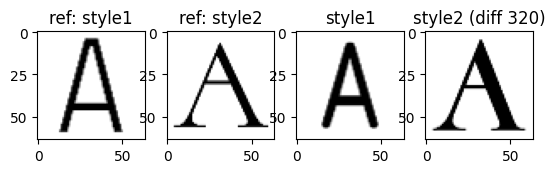

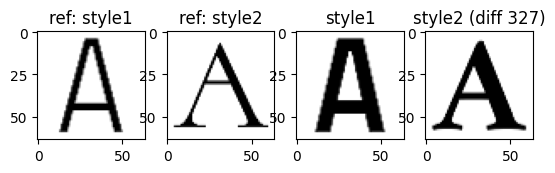

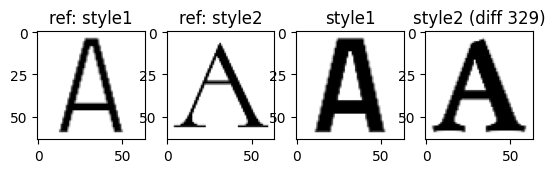

In [61]:
N = 0
sorted_bold_diff_nega = sorted(bold_diff_nega)

for i in range(10):
    nmin_v = sorted_bold_diff_nega[N+i]
    nmin_i = bold_diff_nega.index(nmin_v)
    print(N+i+1, ' diff:', nmin_v, bold_nega_result['style1'][nmin_i], bold_nega_result['style2'][nmin_i])

    s1_img = load_images(bold_nega_result['style1'][nmin_i] + '/A.png', 'cpu')[0][0]
    s2_img = load_images(bold_nega_result['style2'][nmin_i] + '/A.png', 'cpu')[0][0]

    fig, axes = plt.subplots(1, 4)
    axes[0].set_title('ref: style1')
    axes[0].imshow(ref_s1_img, cmap='gray')
    axes[1].set_title('ref: style2')
    axes[1].imshow(ref_s2_img, cmap='gray')
    axes[2].set_title('style1')
    axes[2].imshow(s1_img, cmap='gray')
    axes[3].set_title('style2 (diff {})'.format(int(nmin_v)))
    axes[3].imshow(s2_img, cmap='gray')
    fig.show()


### thin

1  diff: 796.1054077148438 ../font2img/image/Barlow-Thin ../font2img/image/Hanuman-Thin
2  diff: 798.7548828125 ../font2img/image/FiraSansCondensed-Thin ../font2img/image/IBMPlexSerif-Thin
3  diff: 821.5043334960938 ../font2img/image/FiraSansExtraCondensed-Thin ../font2img/image/IBMPlexSerif-Thin
4  diff: 837.0139770507812 ../font2img/image/Chathura-Thin ../font2img/image/Hanuman-Thin
5  diff: 850.8253784179688 ../font2img/image/IBMPlexSansCondensed-Thin ../font2img/image/IBMPlexSerif-Thin
6  diff: 855.2335205078125 ../font2img/image/IBMPlexSansCondensed-Thin ../font2img/image/Hanuman-Thin
7  diff: 859.794189453125 ../font2img/image/FiraSansCondensed-Thin ../font2img/image/Hanuman-Thin
8  diff: 867.1029052734375 ../font2img/image/BarlowSemiCondensed-Thin ../font2img/image/Hanuman-Thin
9  diff: 882.5166015625 ../font2img/image/BarlowSemiCondensed-Thin ../font2img/image/IBMPlexSerif-Thin
10  diff: 888.68408203125 ../font2img/image/Barlow-Thin ../font2img/image/IBMPlexSerif-Thin


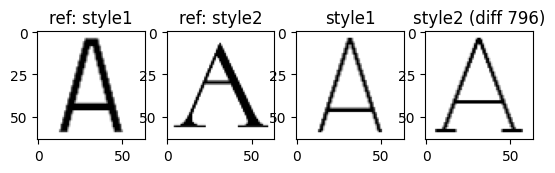

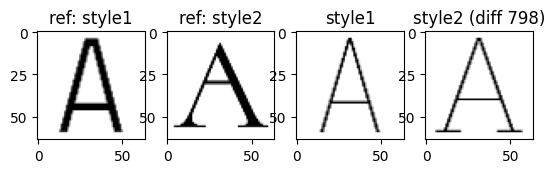

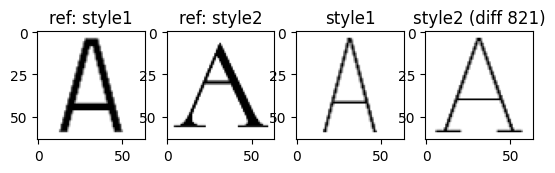

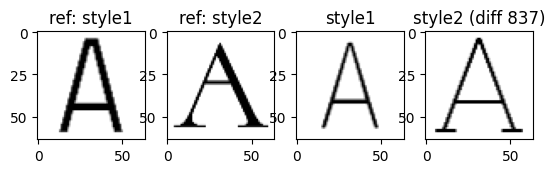

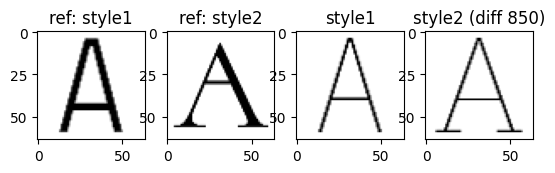

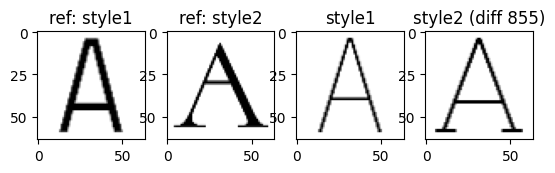

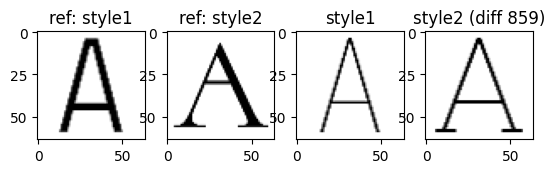

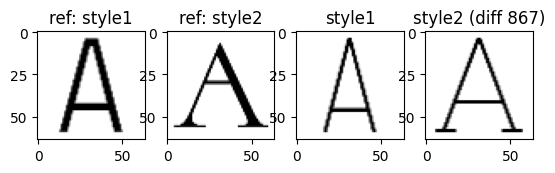

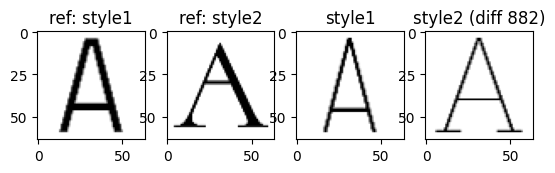

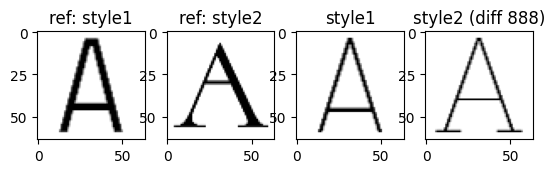

In [62]:
N = 0
sorted_thin_diff_nega = sorted(thin_diff_nega)

for i in range(10):
    nmin_v = sorted_thin_diff_nega[N+i]
    nmin_i = thin_diff_nega.index(nmin_v)
    print(N+i+1, ' diff:', nmin_v, thin_nega_result['style1'][nmin_i], thin_nega_result['style2'][nmin_i])

    s1_img = load_images(thin_nega_result['style1'][nmin_i] + '/A.png', 'cpu')[0][0]
    s2_img = load_images(thin_nega_result['style2'][nmin_i] + '/A.png', 'cpu')[0][0]

    fig, axes = plt.subplots(1, 4)
    axes[0].set_title('ref: style1')
    axes[0].imshow(ref_s1_img, cmap='gray')
    axes[1].set_title('ref: style2')
    axes[1].imshow(ref_s2_img, cmap='gray')
    axes[2].set_title('style1')
    axes[2].imshow(s1_img, cmap='gray')
    axes[3].set_title('style2 (diff {})'.format(int(nmin_v)))
    axes[3].imshow(s2_img, cmap='gray')
    fig.show()


1  diff: 0.0 ../font2img/image/Poly-Regular ../font2img/image/Convergence-Regular
2  diff: 14.69542121887207 ../font2img/image/NotoSerif-Regular ../font2img/image/Convergence-Regular
3  diff: 18.531972885131836 ../font2img/image/Prociono-Regular ../font2img/image/Mukta-Regular
4  diff: 18.531972885131836 ../font2img/image/Prociono-Regular ../font2img/image/Mukta-Regular
5  diff: 18.531972885131836 ../font2img/image/Prociono-Regular ../font2img/image/Mukta-Regular
6  diff: 20.729290008544922 ../font2img/image/Fenix-Regular ../font2img/image/Convergence-Regular
7  diff: 21.55183982849121 ../font2img/image/Halant-Regular ../font2img/image/Mada-Regular
8  diff: 25.689998626708984 ../font2img/image/AbyssinicaSIL-Regular ../font2img/image/Amaranth-Regular
9  diff: 28.63507652282715 ../font2img/image/FrankRuhlLibre-Regular ../font2img/image/Marmelad-Regular
10  diff: 28.635744094848633 ../font2img/image/Brawler-Regular ../font2img/image/Convergence-Regular


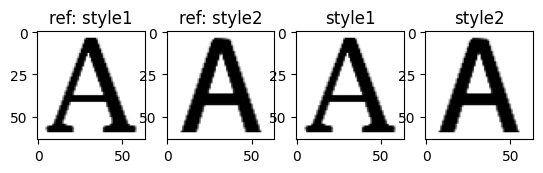

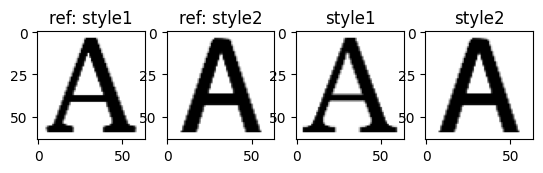

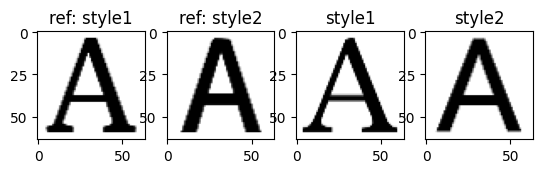

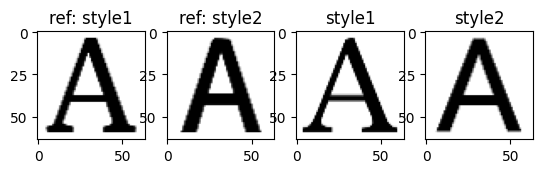

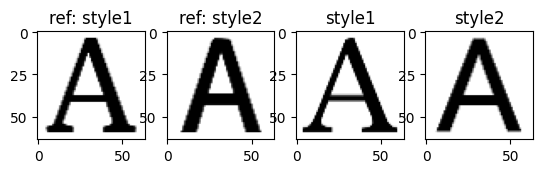

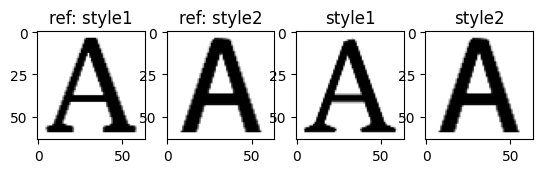

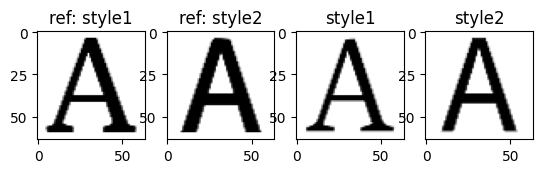

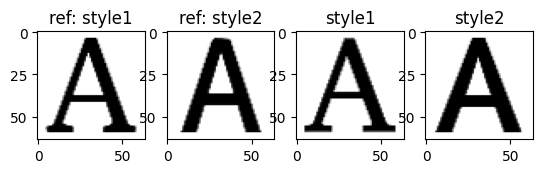

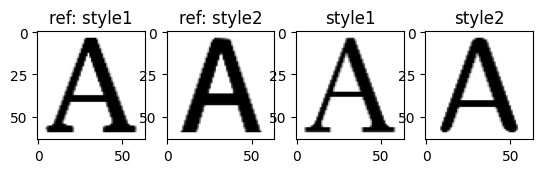

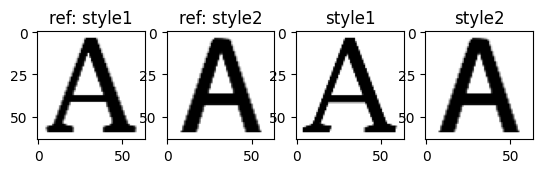

In [18]:
# POSI: MSE(serif - sanserif, serif - sanserif) で n番目に小さい

N = 0

sorted_diff_posi = sorted(diff_posi)

for i in range(10):
    nmin_v = sorted_diff_posi[N+i]
    nmin_i = diff_posi.index(nmin_v)
    print(N+i+1, ' diff:', nmin_v, serif_sanserif_result['style1'][nmin_i], serif_sanserif_result['style2'][nmin_i])

    s1_img = load_images(serif_sanserif_result['style1'][nmin_i] + '/A.png', 'cpu')[0][0]
    s2_img = load_images(serif_sanserif_result['style2'][nmin_i] + '/A.png', 'cpu')[0][0]

    fig, axes = plt.subplots(1, 4)
    axes[0].set_title('ref: style1')
    axes[0].imshow(ref_s1_img, cmap='gray')
    axes[1].set_title('ref: style2')
    axes[1].imshow(ref_s2_img, cmap='gray')
    axes[2].set_title('style1')
    axes[2].imshow(s1_img, cmap='gray')
    axes[3].set_title('style2')
    axes[3].imshow(s2_img, cmap='gray')
    fig.show()


1  diff: 6534.072265625 ../font2img/image/BioRhymeExpanded-Regular ../font2img/image/Anton-Regular
2  diff: 6190.67578125 ../font2img/image/BioRhymeExpanded-Regular ../font2img/image/FjallaOne-Regular
3  diff: 5907.53857421875 ../font2img/image/Glegoo-Regular ../font2img/image/Notable-Regular
4  diff: 5746.7138671875 ../font2img/image/Coustard-Regular ../font2img/image/Dorsa-Regular
5  diff: 5745.03662109375 ../font2img/image/FaunaOne-Regular ../font2img/image/Notable-Regular
6  diff: 5683.12744140625 ../font2img/image/AnticSlab-Regular ../font2img/image/Notable-Regular
7  diff: 5654.67919921875 ../font2img/image/Kadwa-Regular ../font2img/image/Dorsa-Regular
8  diff: 5612.51513671875 ../font2img/image/BreeSerif-Regular ../font2img/image/Dorsa-Regular
9  diff: 5559.6015625 ../font2img/image/Karma-Regular ../font2img/image/Notable-Regular
10  diff: 5478.87744140625 ../font2img/image/Nokora-Regular ../font2img/image/Notable-Regular


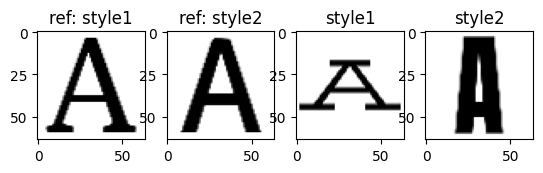

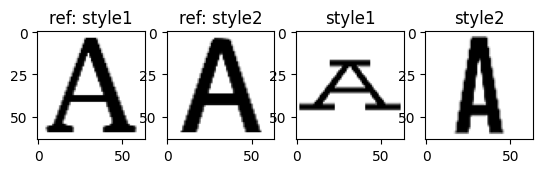

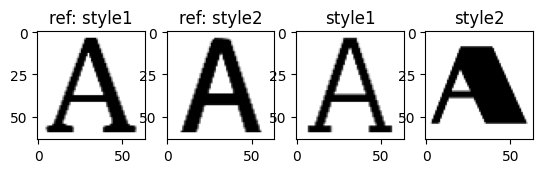

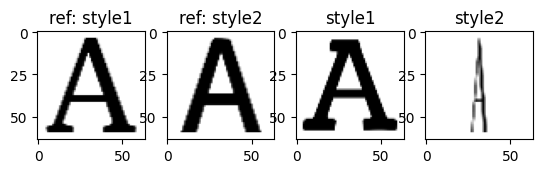

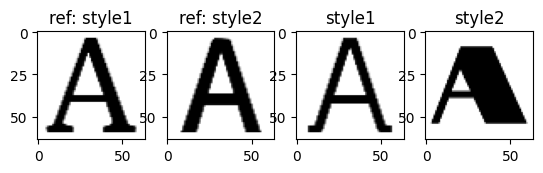

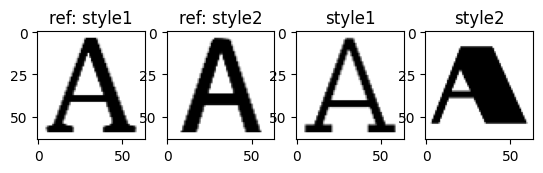

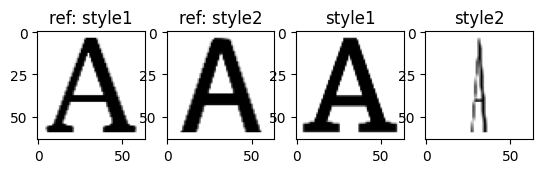

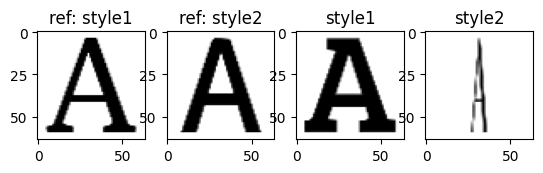

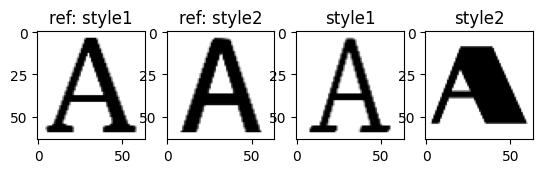

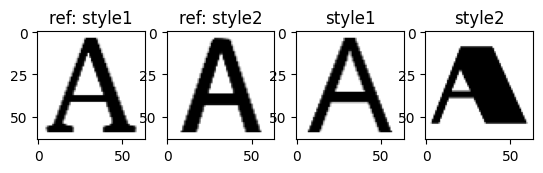

In [20]:
# POSI: MSE(serif - sanserif, serif - sanserif) で最大
N = 0

sorted_diff_posi = sorted(diff_posi)

for i in range(10):
    nmax_v = sorted_diff_posi[-(N+i+1)]
    nmax_i = diff_posi.index(nmax_v)
    print(N+i+1, ' diff:', nmax_v, serif_sanserif_result['style1'][nmax_i], serif_sanserif_result['style2'][nmax_i])

    s1_img = load_images(serif_sanserif_result['style1'][nmax_i] + '/A.png', 'cpu')[0][0]
    s2_img = load_images(serif_sanserif_result['style2'][nmax_i] + '/A.png', 'cpu')[0][0]

    fig, axes = plt.subplots(1, 4)
    axes[0].set_title('ref: style1')
    axes[0].imshow(ref_s1_img, cmap='gray')
    axes[1].set_title('ref: style2')
    axes[1].imshow(ref_s2_img, cmap='gray')
    axes[2].set_title('style1')
    axes[2].imshow(s1_img, cmap='gray')
    axes[3].set_title('style2')
    axes[3].imshow(s2_img, cmap='gray')
    fig.show()


6534.072265625
../font2img/image/BioRhymeExpanded-Regular ../font2img/image/Anton-Regular


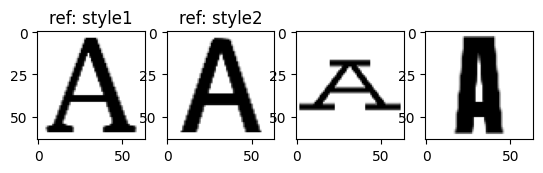

In [23]:
# POSI: MSE(serif - sanserif, serif - sanserif) で n番目に大きい

N = 1
nmax_v = sorted(diff_posi)[-N]
print(nmax_v)
nmax_i = diff_posi.index(nmax_v)
print(serif_sanserif_result['style1'][nmax_i], serif_sanserif_result['style2'][nmax_i])

s1_img = load_images(serif_sanserif_result['style1'][nmax_i] + '/A.png', 'cpu')[0][0]
s2_img = load_images(serif_sanserif_result['style2'][nmax_i] + '/A.png', 'cpu')[0][0]


fig, axes = plt.subplots(1, 4)
axes[0].set_title('ref: style1')
axes[0].imshow(ref_s1_img, cmap='gray')
axes[1].set_title('ref: style2')
axes[1].imshow(ref_s2_img, cmap='gray')

axes[2].imshow(s1_img, cmap='gray')
axes[3].imshow(s2_img, cmap='gray')

353.4177551269531
../font2img/image/Asul-Regular ../font2img/image/Gurajada-Regular


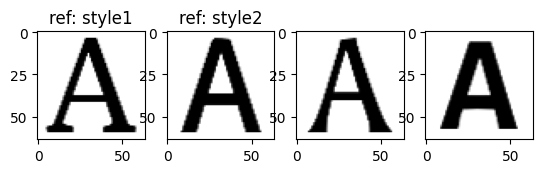

In [24]:
# NEGA: MSE(serif - sanserif, sanserif - serif) で最小

min_v = min(diff_nega)
print(min_v)
min_i = diff_nega.index(min_v)
print(sanserif_serif_result['style1'][min_i], sanserif_serif_result['style2'][min_i])

s1_img = load_images(sanserif_serif_result['style1'][min_i] + '/A.png', 'cpu')[0][0]
s2_img = load_images(sanserif_serif_result['style2'][min_i] + '/A.png', 'cpu')[0][0]


fig, axes = plt.subplots(1, 4)
axes[0].set_title('ref: style1')
axes[0].imshow(ref_s1_img, cmap='gray')
axes[1].set_title('ref: style2')
axes[1].imshow(ref_s2_img, cmap='gray')

axes[2].imshow(s1_img, cmap='gray')
axes[3].imshow(s2_img, cmap='gray')

1  diff: 353.4177551269531 ../font2img/image/Asul-Regular ../font2img/image/Gurajada-Regular
2  diff: 386.81402587890625 ../font2img/image/Asul-Regular ../font2img/image/Nokora-Regular
3  diff: 478.2949523925781 ../font2img/image/HermeneusOne-Regular ../font2img/image/Gurajada-Regular
4  diff: 480.083251953125 ../font2img/image/Asul-Regular ../font2img/image/Dhyana-Regular
5  diff: 482.3288879394531 ../font2img/image/Philosopher-Regular ../font2img/image/Nokora-Regular
6  diff: 516.0786743164062 ../font2img/image/Philosopher-Regular ../font2img/image/Dhyana-Regular
7  diff: 547.8350830078125 ../font2img/image/Philosopher-Regular ../font2img/image/Artifika-Regular
8  diff: 551.4505004882812 ../font2img/image/Federo-Regular ../font2img/image/Nokora-Regular
9  diff: 562.7459716796875 ../font2img/image/Philosopher-Regular ../font2img/image/MarcellusSC-Regular
10  diff: 562.7459716796875 ../font2img/image/Philosopher-Regular ../font2img/image/MarcellusSC-Regular


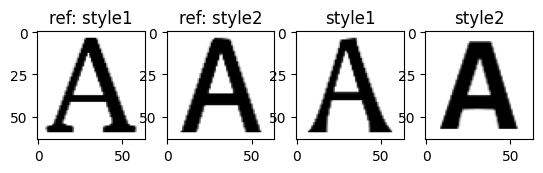

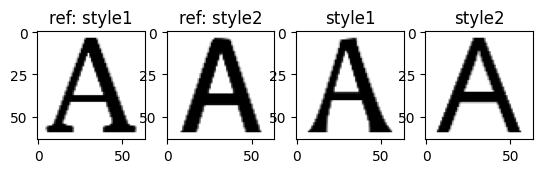

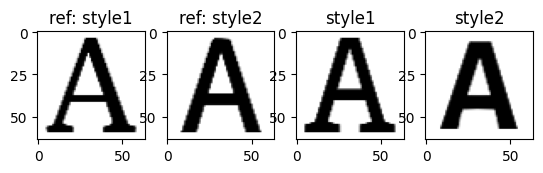

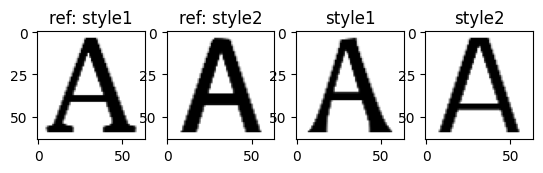

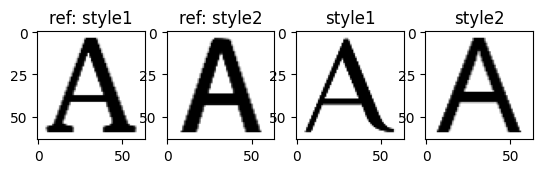

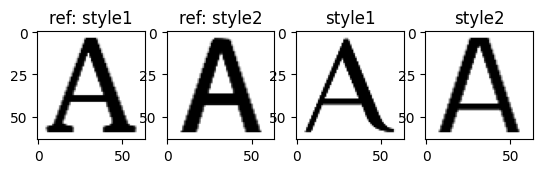

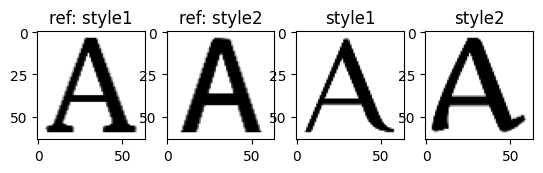

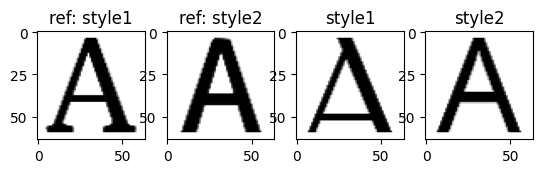

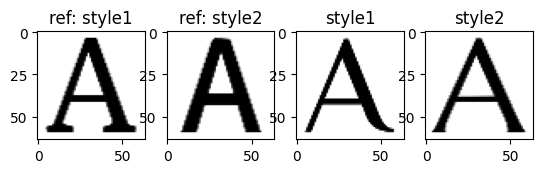

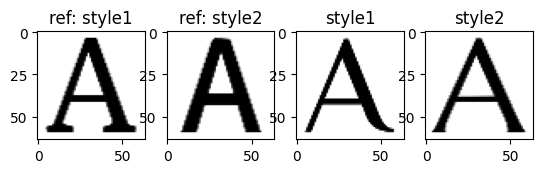

In [26]:
# NEGA: MSE(serif - sanserif, sanserif - serif) で n番目に小さい

N = 0
sorted_diff_nega = sorted(diff_nega)

for i in range(10):
    nmin_v = sorted_diff_nega[N+i]
    nmin_i = diff_nega.index(nmin_v)
    print(N+i+1, ' diff:', nmin_v, sanserif_serif_result['style1'][nmin_i], sanserif_serif_result['style2'][nmin_i])

    s1_img = load_images(sanserif_serif_result['style1'][nmin_i] + '/A.png', 'cpu')[0][0]
    s2_img = load_images(sanserif_serif_result['style2'][nmin_i] + '/A.png', 'cpu')[0][0]

    fig, axes = plt.subplots(1, 4)
    axes[0].set_title('ref: style1')
    axes[0].imshow(ref_s1_img, cmap='gray')
    axes[1].set_title('ref: style2')
    axes[1].imshow(ref_s2_img, cmap='gray')
    axes[2].set_title('style1')
    axes[2].imshow(s1_img, cmap='gray')
    axes[3].set_title('style2')
    axes[3].imshow(s2_img, cmap='gray')
    fig.show()


8506.5498046875
../font2img/image/BlackHanSans-Regular ../font2img/image/Bitter[wght]


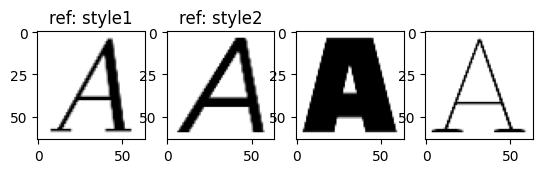

In [141]:
# NEGA: MSE(serif - sanserif, sanserif - serif) で最大

max_v = max(diff_nega)
print(max_v)
max_i = diff_nega.index(max_v)
print(sanserif_serif_result['style1'][max_i], sanserif_serif_result['style2'][max_i])

s1_img = load_images(sanserif_serif_result['style1'][max_i] + '/A.png', 'cpu')[0][0]
s2_img = load_images(sanserif_serif_result['style2'][max_i] + '/A.png', 'cpu')[0][0]


fig, axes = plt.subplots(1, 4)
axes[0].set_title('ref: style1')
axes[0].imshow(ref_s1_img, cmap='gray')
axes[1].set_title('ref: style2')
axes[1].imshow(ref_s2_img, cmap='gray')

axes[2].imshow(s1_img, cmap='gray')
axes[3].imshow(s2_img, cmap='gray')
